In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Diwali Sales Data.csv", encoding='unicode escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.shape

(11251, 13)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(11239, 13)

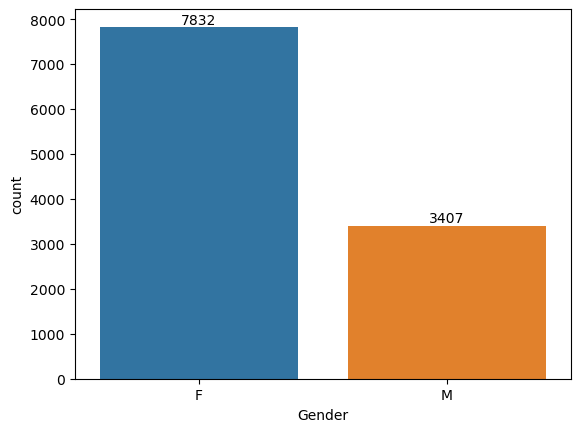

In [12]:
ax = sns.countplot(x = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

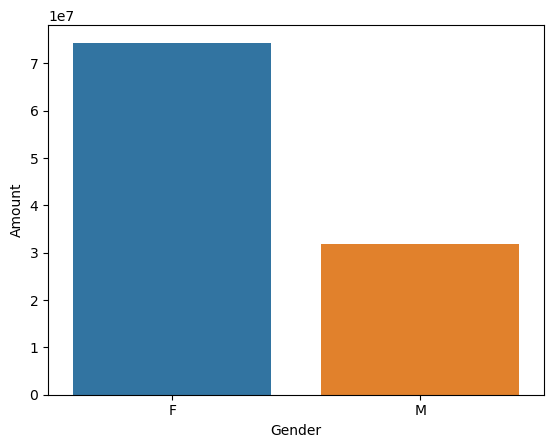

In [13]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(['Amount'], ascending=False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

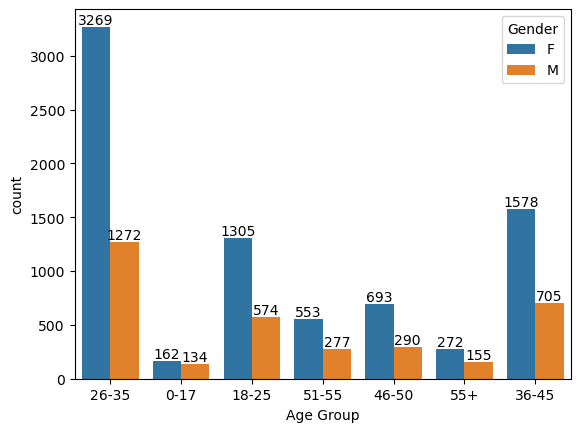

In [14]:
ax = sns.countplot(x = 'Age Group', data = df, hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

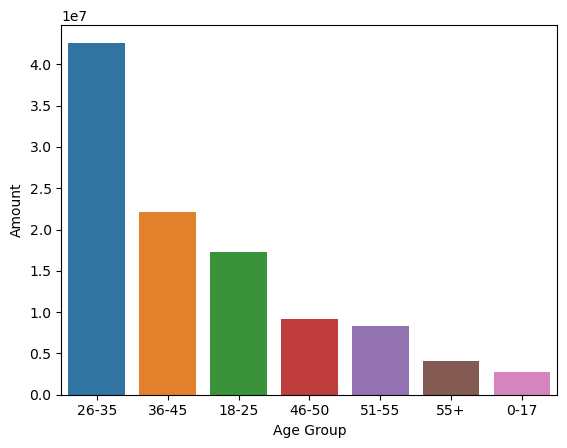

In [15]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by = ['Amount'], ascending=False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

<AxesSubplot:xlabel='State', ylabel='Orders'>

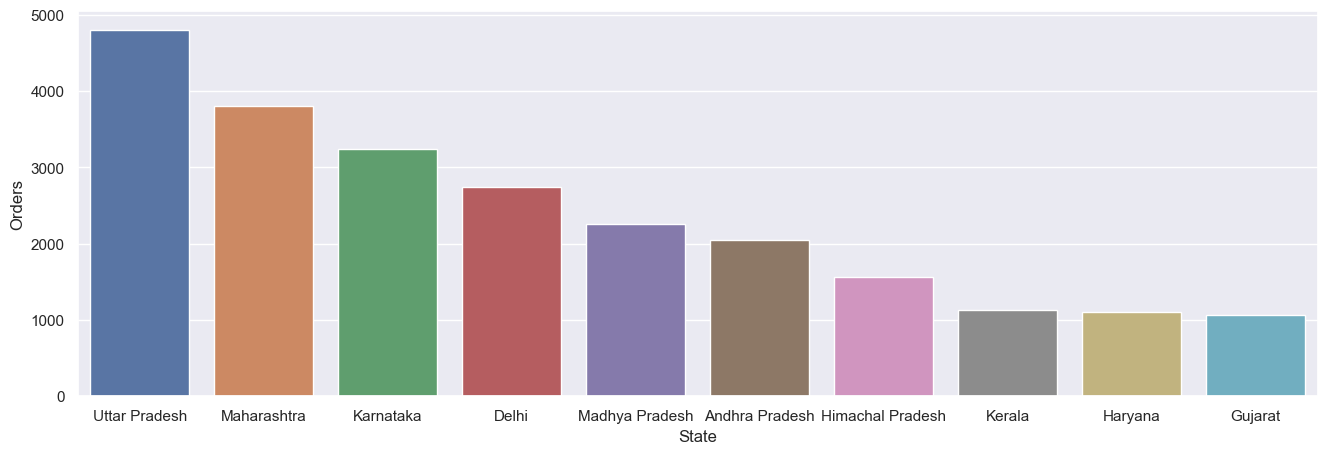

In [16]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by = ['Orders'], ascending=False).head(10)
sns.set(rc = {'figure.figsize' : (16,5)})
sns.barplot(x = 'State', y = 'Orders', data = sales_state)

<AxesSubplot:xlabel='State', ylabel='Amount'>

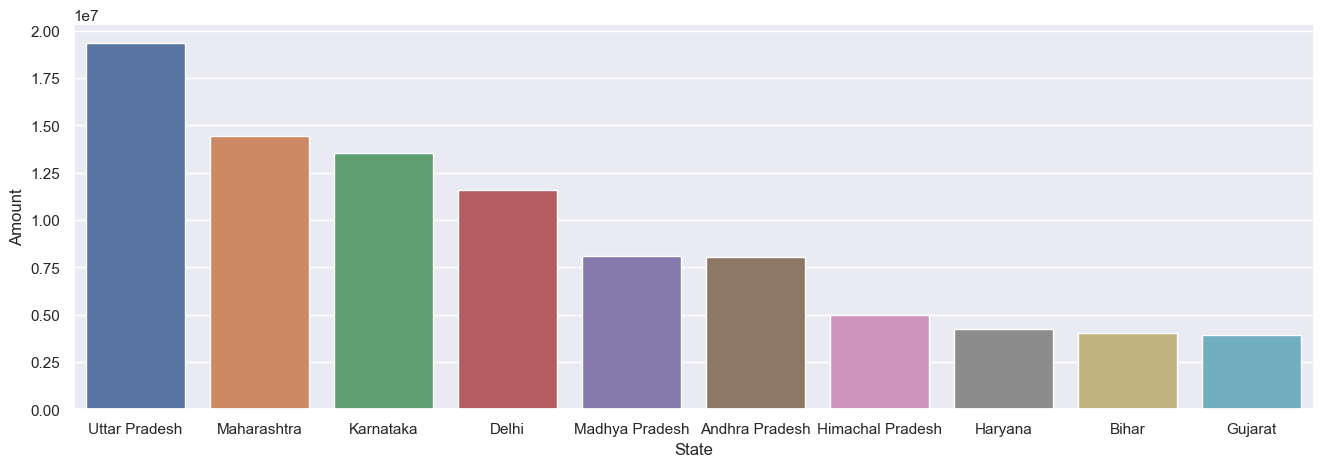

In [17]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by = ['Amount'], ascending=False).head(10)
sns.set(rc = {'figure.figsize' : (16,5)})
sns.barplot(x = 'State', y = 'Amount', data = sales_state)

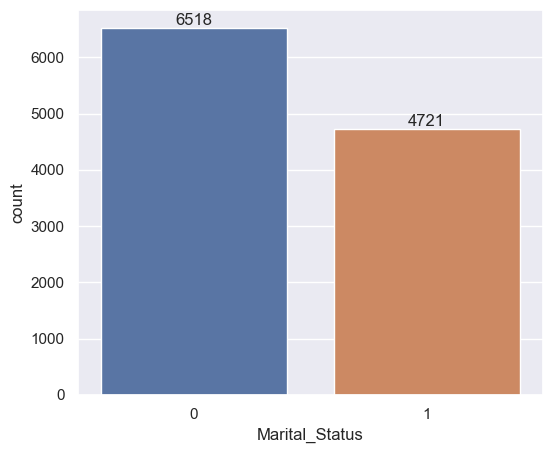

In [25]:
sns.set(rc = {'figure.figsize' : (6,5)})
ax = sns.countplot(x = 'Marital_Status', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

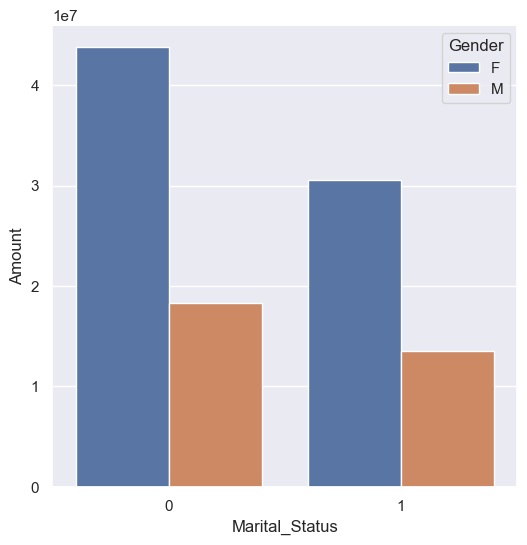

In [19]:
sales_mag = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by = ['Amount'], ascending=False)
sns.set(rc={'figure.figsize':(6,6)})
sns.barplot(x = 'Marital_Status', y = 'Amount', data = sales_mag, hue = 'Gender')

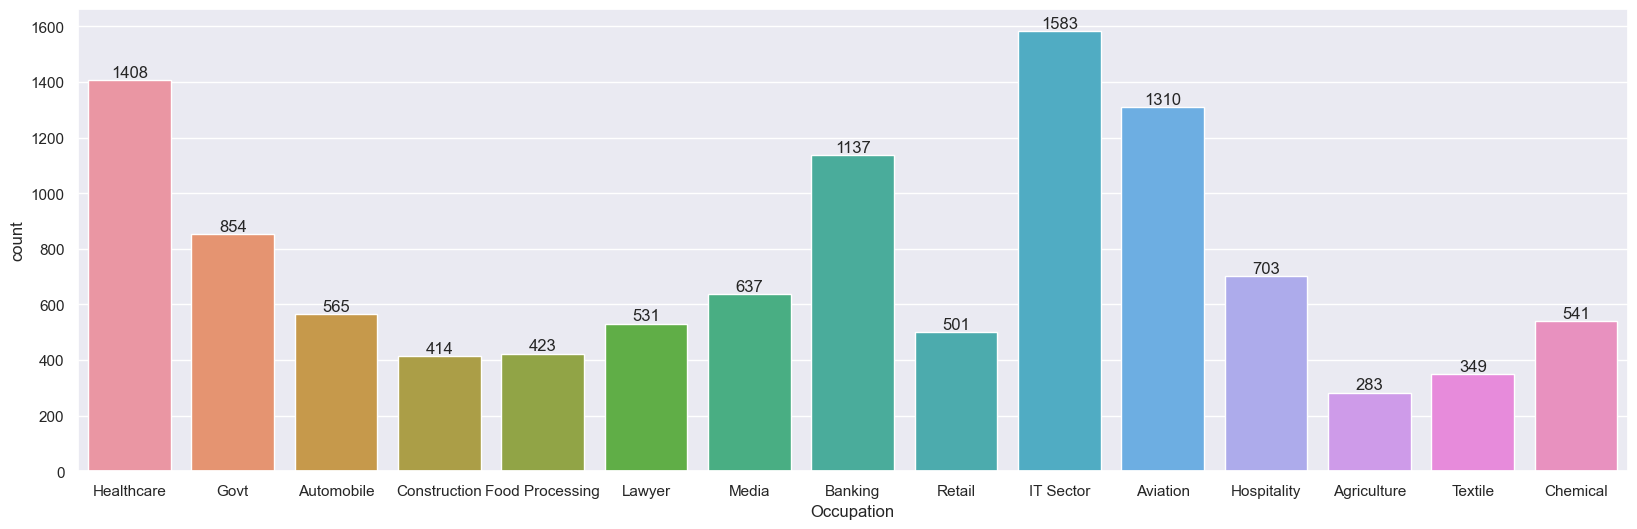

In [20]:
sns.set(rc={'figure.figsize':(20,6)})
ax = sns.countplot(x = 'Occupation', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

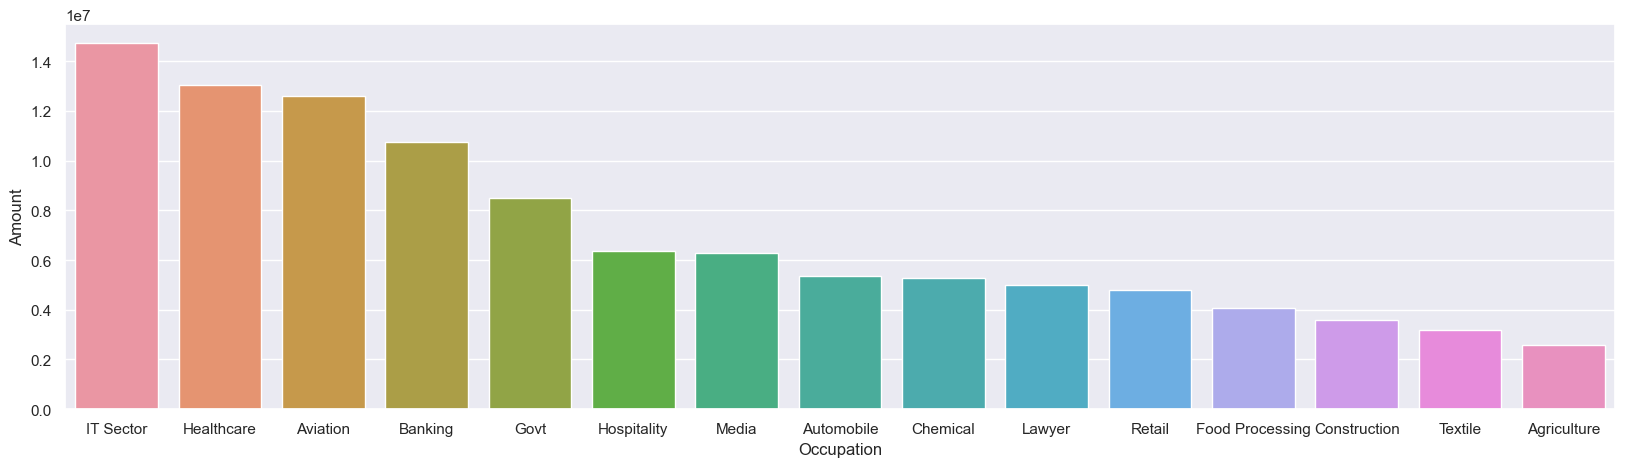

In [21]:
sales_occ = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by = ['Amount'], ascending=False)
sns.set(rc = {'figure.figsize' : (20,5)})
sns.barplot(x = 'Occupation', y = 'Amount', data = sales_occ)

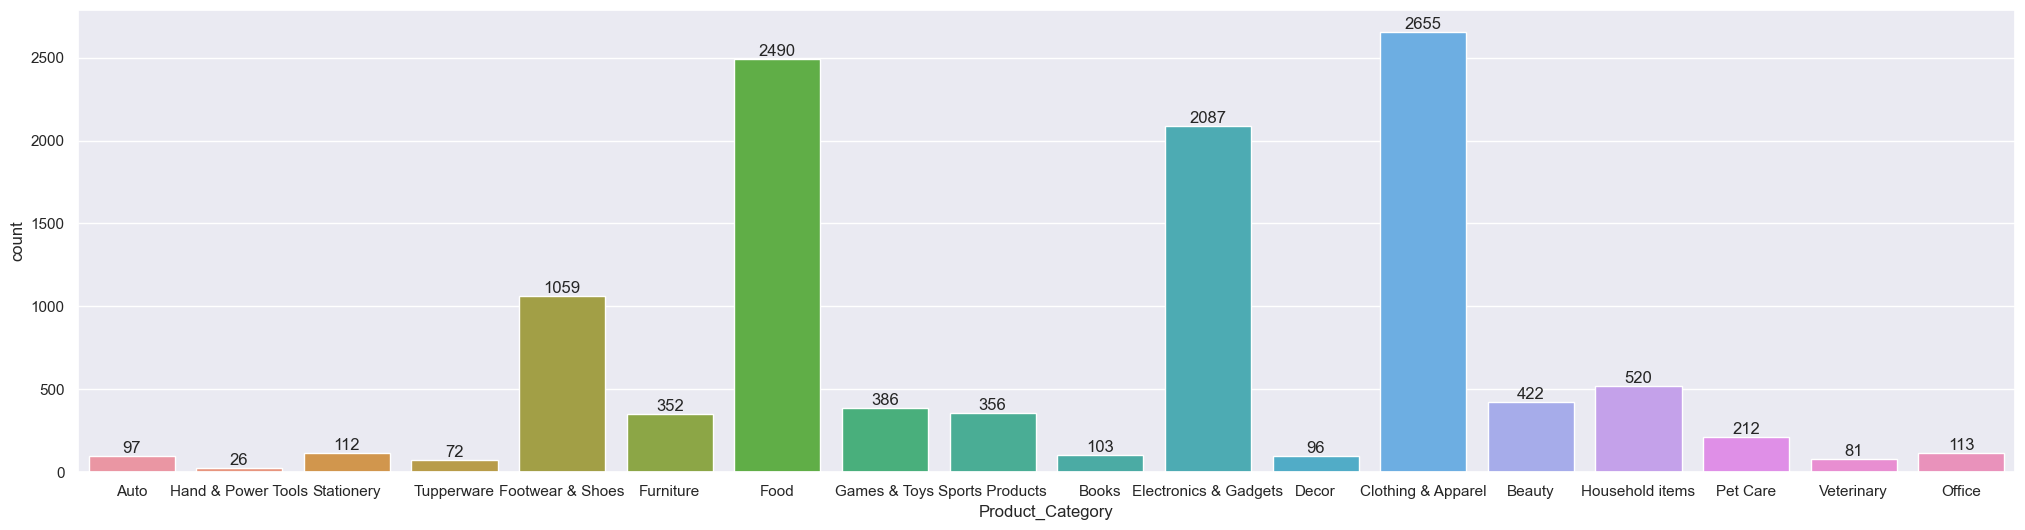

In [22]:
sns.set(rc={'figure.figsize':(25,6)})
ax = sns.countplot(x = 'Product_Category', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

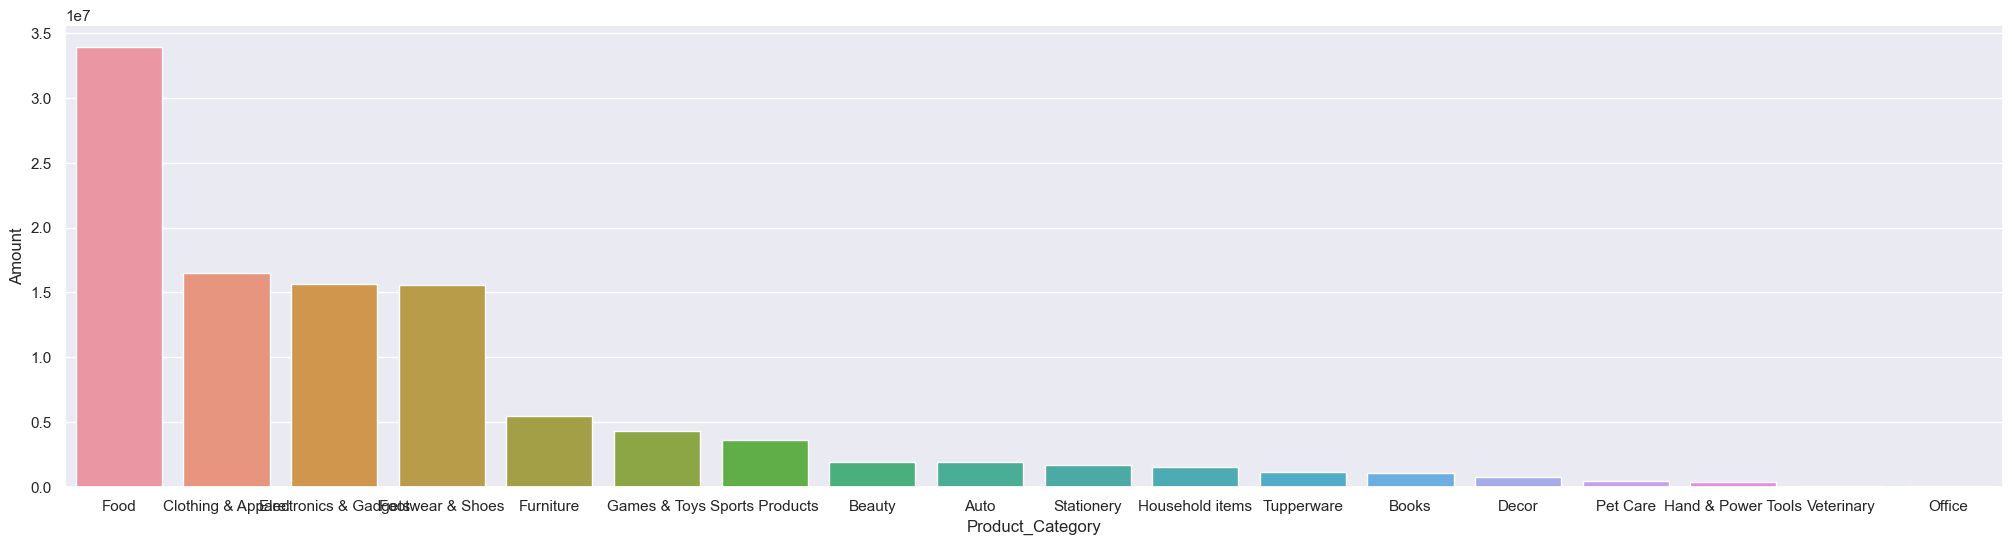

In [23]:
sales_prod = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by = ['Amount'], ascending=False)
sns.set(rc={'figure.figsize':(25,6)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_prod)

<AxesSubplot:xlabel='Product_ID', ylabel='Amount'>

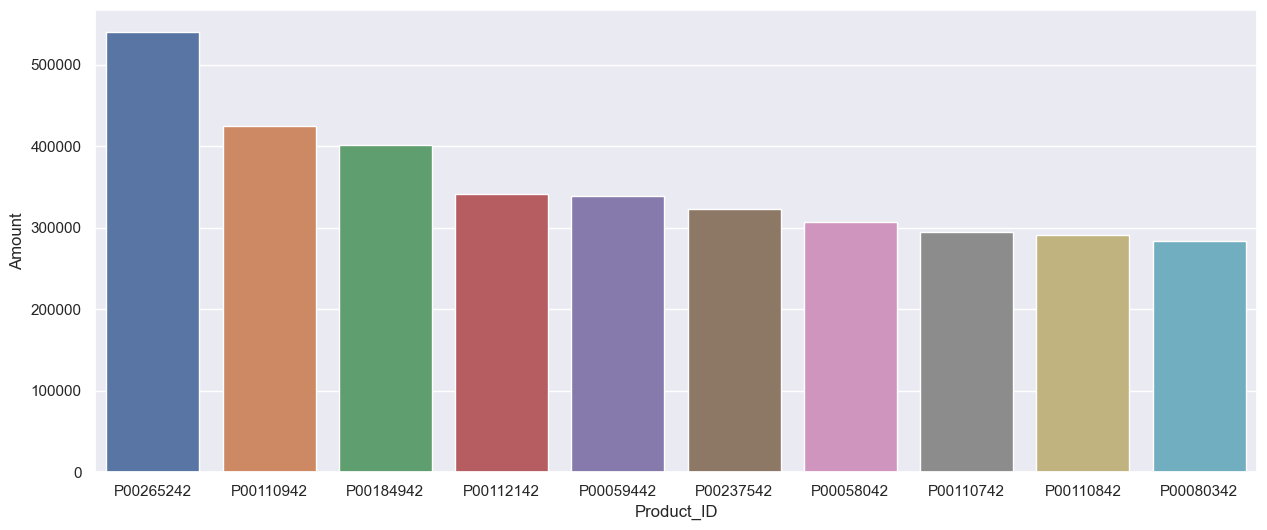

In [24]:
sales_prodid = df.groupby(['Product_ID'], as_index=False)['Amount'].sum().sort_values(by = ['Amount'], ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x = 'Product_ID', y = 'Amount', data = sales_prodid)

*CONCLUSION: Married women of age group 26-35 yrs from Uttar Pradesh, Maharashtra, and Karnataka working in IT, Heatlhcare, and Aviation are more likely to buy products from Food, Clothing and Electronic gadgets.*